In [50]:
import requests
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import nbastats.nbastats as nba
from nba_py import player

from IPython.display import IFrame

sns.set_color_codes()
sns.set_style("white")

In [57]:
shot_chart_url = 'http://stats.nba.com/stats/shotchartdetail?Period=0&VsConference=&LeagueID=00&LastNGames=0&TeamID=0&Position=&Location=&Outcome=&ContextMeasure=FGA&DateFrom=&StartPeriod=&DateTo=&OpponentTeamID=0&ContextFilter=&RangeType=&Season=2015-16&AheadBehind=&PlayerID=201939&EndRange=&VsDivision=&PointDiff=&RookieYear=&GameSegment=&Month=0&ClutchTime=&StartRange=&EndPeriod=&SeasonType=Regular+Season&SeasonSegment=&GameID='
                
print shot_chart_url

http://stats.nba.com/stats/shotchartdetail?Period=0&VsConference=&LeagueID=00&LastNGames=0&TeamID=0&Position=&Location=&Outcome=&ContextMeasure=FGA&DateFrom=&StartPeriod=&DateTo=&OpponentTeamID=0&ContextFilter=&RangeType=&Season=2015-16&AheadBehind=&PlayerID=201939&EndRange=&VsDivision=&PointDiff=&RookieYear=&GameSegment=&Month=0&ClutchTime=&StartRange=&EndPeriod=&SeasonType=Regular+Season&SeasonSegment=&GameID=


In [60]:
# Get the webpage containing the data
response = requests.get(shot_chart_url)
print response
# Grab the headers to be used as column headers for our DataFrame
headers = response.json()['resultSets'][0]['headers']
print headers
# Grab the shot chart data
shots = response.json()['resultSets'][0]['rowSet']


<Response [200]>
[u'GRID_TYPE', u'GAME_ID', u'GAME_EVENT_ID', u'PLAYER_ID', u'PLAYER_NAME', u'TEAM_ID', u'TEAM_NAME', u'PERIOD', u'MINUTES_REMAINING', u'SECONDS_REMAINING', u'EVENT_TYPE', u'ACTION_TYPE', u'SHOT_TYPE', u'SHOT_ZONE_BASIC', u'SHOT_ZONE_AREA', u'SHOT_ZONE_RANGE', u'SHOT_DISTANCE', u'LOC_X', u'LOC_Y', u'SHOT_ATTEMPTED_FLAG', u'SHOT_MADE_FLAG']


In [61]:
shot_df = pd.DataFrame(shots, columns=headers)
# View the head of the DataFrame and all its columns
from IPython.display import display
with pd.option_context('display.max_columns', None):
    display(shot_df.head())

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,EVENT_TYPE,ACTION_TYPE,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG
0,Shot Chart Detail,0021500003,6,201939,Stephen Curry,1610612744,Golden State Warriors,1,10,56,Made Shot,Cutting Finger Roll Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,3,12,31,1,1
1,Shot Chart Detail,0021500003,9,201939,Stephen Curry,1610612744,Golden State Warriors,1,10,29,Missed Shot,Jump Shot,3PT Field Goal,Above the Break 3,Left Side Center(LC),24+ ft.,26,-176,195,1,0
2,Shot Chart Detail,0021500003,14,201939,Stephen Curry,1610612744,Golden State Warriors,1,9,34,Missed Shot,Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,2,20,9,1,0
3,Shot Chart Detail,0021500003,19,201939,Stephen Curry,1610612744,Golden State Warriors,1,9,13,Made Shot,Jump Shot,3PT Field Goal,Above the Break 3,Left Side Center(LC),24+ ft.,27,-197,193,1,1
4,Shot Chart Detail,0021500003,36,201939,Stephen Curry,1610612744,Golden State Warriors,1,7,11,Made Shot,Running Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,0,-4,8,1,1


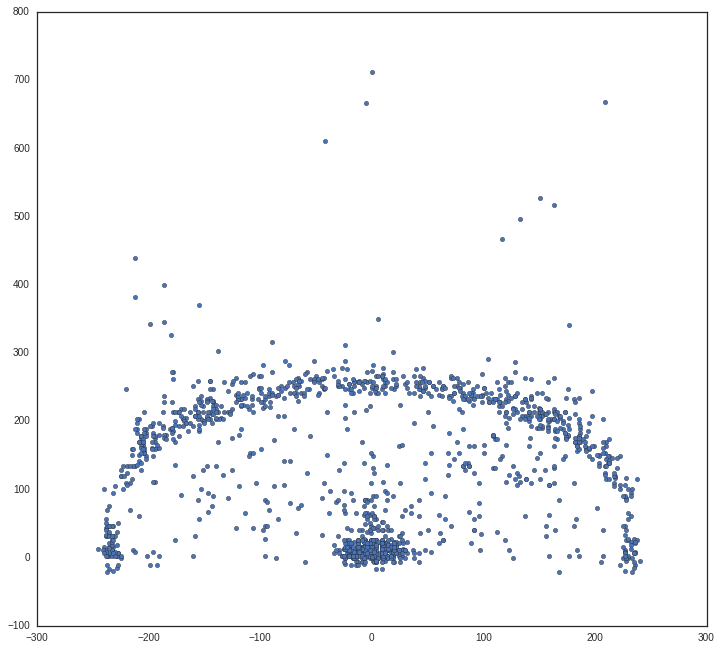

In [62]:
sns.set_style("white")
sns.set_color_codes()
plt.figure(figsize=(12,11))
plt.scatter(shot_df.LOC_X, shot_df.LOC_Y)
plt.show()

In [64]:
from matplotlib.patches import Circle, Rectangle, Arc

def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

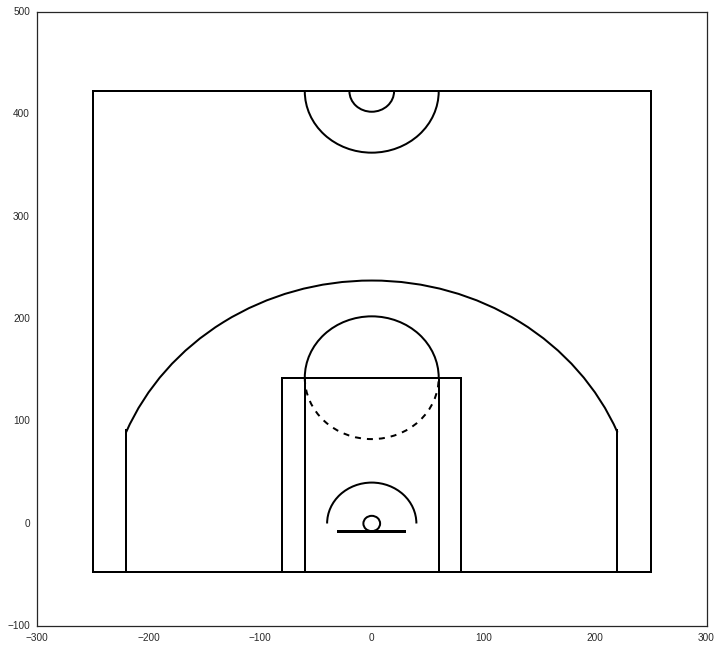

In [65]:
plt.figure(figsize=(12,11))
draw_court(outer_lines=True)
plt.xlim(-300,300)
plt.ylim(-100,500)
plt.show()

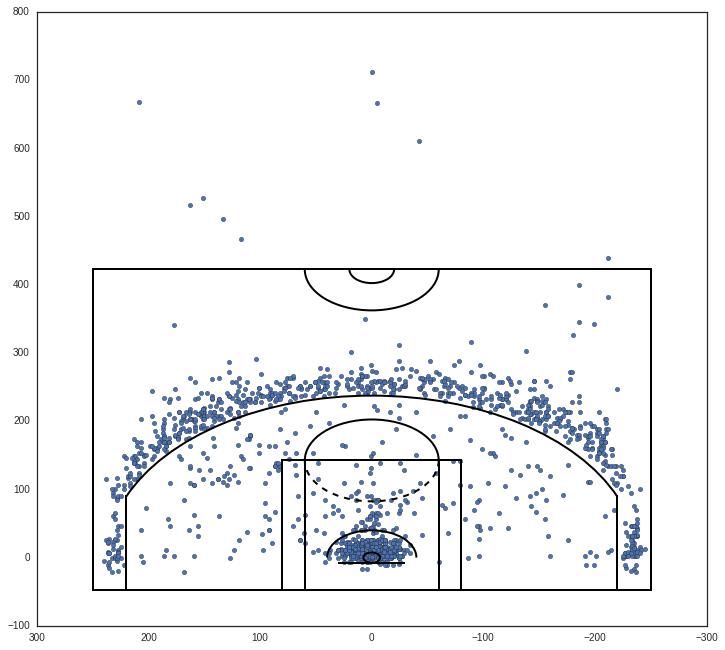

In [66]:
plt.figure(figsize=(12,11))
plt.scatter(shot_df.LOC_X, shot_df.LOC_Y)
draw_court(outer_lines=True)
# Descending values along the axis from left to right
plt.xlim(300,-300)
plt.show()

In [67]:
shot_df = shot_df[shot_df.LOC_Y < 420]

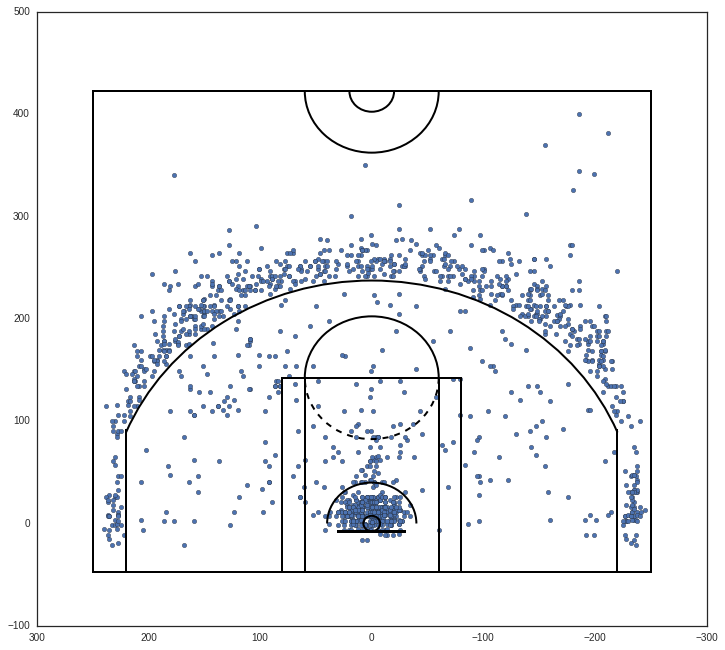

In [68]:
plt.figure(figsize=(12,11))
plt.scatter(shot_df.LOC_X, shot_df.LOC_Y)
draw_court(outer_lines=True)
# Descending values along the axis from left to right
plt.xlim(300,-300)
plt.show()

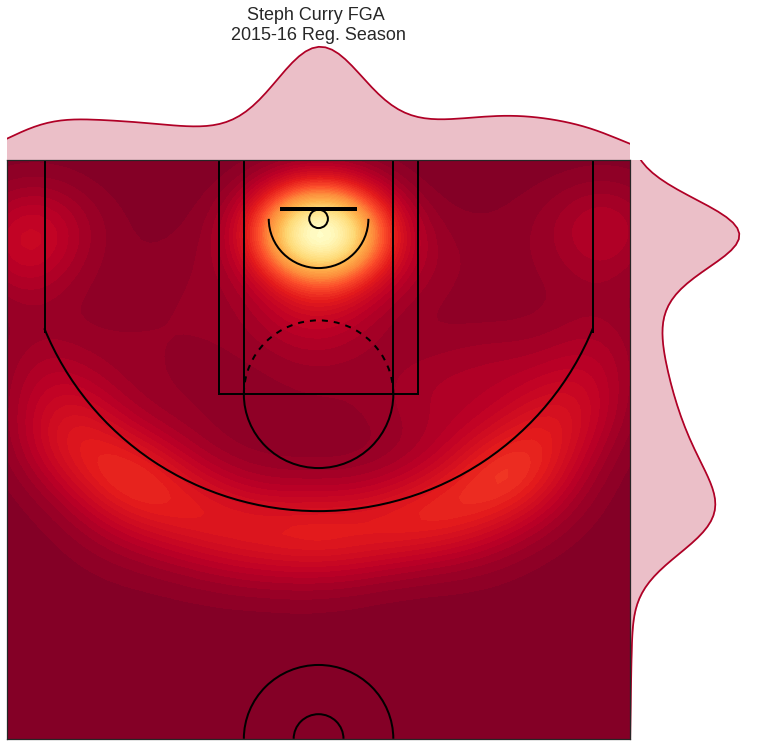

In [69]:
cmap=plt.cm.YlOrRd_r 

# n_levels sets the number of contour lines for the main kde plot
joint_shot_chart = sns.jointplot(shot_df.LOC_X, shot_df.LOC_Y, stat_func=None,
                                 kind='kde', space=0, color=cmap(0.1),
                                 cmap=cmap, n_levels=50)

joint_shot_chart.fig.set_size_inches(12,11)

# A joint plot has 3 Axes, the first one called ax_joint 
# is the one we want to draw our court onto and adjust some other settings
ax = joint_shot_chart.ax_joint
draw_court(ax)

# Adjust the axis limits and orientation of the plot in order
# to plot half court, with the hoop by the top of the plot
ax.set_xlim(-250,250)
ax.set_ylim(422.5, -47.5)

# Get rid of axis labels and tick marks
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelbottom='off', labelleft='off')

# Add a title
ax.set_title('Steph Curry FGA \n2015-16 Reg. Season', 
             y=1.2, fontsize=18)


In [ ]:
IFrame('http://stats.nba.com/movement/#!/?GameID=0041400235&GameEventID=308',
              width=700, height=400)

url = "http://stats.nba.com/stats/locations_getmoments/?eventid=308&gameid=0041400235"


In [ ]:
# Get the webpage
response = requests.get(url)
# Take a look at the keys from the dict
# representing the JSON data
response.json().keys()

In [ ]:
# from __future__ import print_function


ap = player.PlayerList()
print(ap.info())

In [6]:
steph = nba.ShotChart('201939')
steph.shotchart().head()

ValueError: No JSON object could be decoded

In [48]:
import requests  
import json  
import pandas as pd

players = []  
player_stats = {'name':None,'avg_dribbles':None,'avg_touch_time':None,'avg_shot_distance':None,'avg_defender_distance':None}

def find_stats(name,player_id):  
    
    url = 'http://stats.nba.com/stats/shotchartdetail?Period=0&VsConference=&LeagueID=00&LastNGames=0'+ \
    '&TeamID=0&Position=&Location=&Outcome=&ContextMeasure=FGA&DateFrom=&StartPeriod=&DateTo=&'+ \
    'OpponentTeamID=0&ContextFilter=&RangeType=&Season=2015-16&AheadBehind=&PlayerID='+player_id+'&EndRange=&'+\
    'VsDivision=&PointDiff=&RookieYear=&GameSegment=&Month=0&ClutchTime=&StartRange=&EndPeriod=&'+\
    'SeasonType=Regular+Season&SeasonSegment=&GameID='
    print url

    #Create Dict based on JSON response
    response = requests.get(url)
    print response
    shots = response.json()['resultSets'][0]['rowSet']
    data = json.loads(response.text)

    #Create df from data and find averages 
    headers = data['resultSets'][0]['headers']
    print headers
    shot_data = data['resultSets'][0]['rowSet']
    df = pd.DataFrame(shot_data,columns=headers) 
    avg_def = df['CLOSE_DEF_DIST'].mean(axis=1)
    avg_dribbles = df['DRIBBLES'].mean(axis=1)
    avg_shot_distance = df['SHOT_DIST'].mean(axis=1)
    avg_touch_time = df['TOUCH_TIME'].mean(axis=1)

    #add Averages to dictionary then to list
    player_stats['name'] = name
    player_stats['avg_defender_distance']=avg_def
    player_stats['avg_shot_distance'] = avg_shot_distance
    player_stats['avg_touch_time'] = avg_touch_time
    player_stats['avg_dribbles'] = avg_dribbles
    players.append(player_stats.copy())
    
print find_stats("stephen curry", '201939')

http://stats.nba.com/stats/shotchartdetail?Period=0&VsConference=&LeagueID=00&LastNGames=0&TeamID=0&Position=&Location=&Outcome=&ContextMeasure=FGA&DateFrom=&StartPeriod=&DateTo=&OpponentTeamID=0&ContextFilter=&RangeType=&Season=2015-16&AheadBehind=&PlayerID=201939&EndRange=&VsDivision=&PointDiff=&RookieYear=&GameSegment=&Month=0&ClutchTime=&StartRange=&EndPeriod=&SeasonType=Regular+Season&SeasonSegment=&GameID=
<Response [200]>
[u'GRID_TYPE', u'GAME_ID', u'GAME_EVENT_ID', u'PLAYER_ID', u'PLAYER_NAME', u'TEAM_ID', u'TEAM_NAME', u'PERIOD', u'MINUTES_REMAINING', u'SECONDS_REMAINING', u'EVENT_TYPE', u'ACTION_TYPE', u'SHOT_TYPE', u'SHOT_ZONE_BASIC', u'SHOT_ZONE_AREA', u'SHOT_ZONE_RANGE', u'SHOT_DISTANCE', u'LOC_X', u'LOC_Y', u'SHOT_ATTEMPTED_FLAG', u'SHOT_MADE_FLAG']


KeyError: 'CLOSE_DEF_DIST'